<h2>자전거 대여 수요 예측 경진대회</h2>

https://www.kaggle.com/competitions/bike-sharing-demand

<img src = "./img/evaluation.png" alt="bike"/>


<h2>제출 형태</h2>

```
datetime,count
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
...
...
```


In [1]:
#데이터 불러오기

import numpy as np
import pandas as pd

data_path = './data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
sampleSubmission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<h3>Data Fields</h3>

| 필드명 | 설명 |
|--------|------|
| datetime | 시간별 날짜 + 타임스탬프 |
| season | 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 |
| holiday | 해당 일이 공휴일인지 여부 |
| workingday | 해당 일이 주말도 공휴일도 아닌지 여부 |
| weather | 1: 맑음, 구름 조금, 약간 흐림, 부분적 흐림<br>2: 안개 + 흐림, 안개 + 구름 조각, 안개 + 구름 조금, 안개<br>3: 약한 눈, 약한 비 + 천둥 + 흩어진 구름, 약한 비 + 흩어진 구름<br>4: 폭우 + 얼음 알갱이 + 천둥 + 안개, 눈 + 안개 |
| temp | 섭씨 온도 |
| atemp | 체감 온도 (섭씨) |
| humidity | 상대 습도 |
| windspeed | 풍속 |
| casual | 비등록 사용자의 대여 시작 수 |
| registered | 등록 사용자의 대여 시작 수 |
| count | 총 대여 수 |

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


datetime의 형태가 문자열이라 숫자로 변환해야 한다.

In [6]:
print(train['datetime'][100])
print(type(train['datetime'][100]))

2011-01-05 09:00:00
<class 'str'>


In [7]:
# 책 방법
# train['date'] = train['datetime'].apply(lambda x: x.split()[0])
# train['year'],train['month'],train['day'] = zip(*train['datetime'].apply(lambda x: x.split()[0].split('-')))
# train['hour'],train['minute'],train['second'] = zip(*train['datetime'].apply(lambda x:x.split()[1].split(':')))
# train.head()

In [8]:
# datetime 열을 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 날짜와 시간 정보 추출
train['date'] = train['datetime'].dt.date
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.day_name()

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,4,0,0,Saturday


In [9]:
train['season'] = train['season'].map({1:'Spring',2: 'Summer', 3: 'Fall', 4: 'Winter'})
train['weather'] = train['weather'].map({1:'Clear',2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog '})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,4,0,0,Saturday


In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline

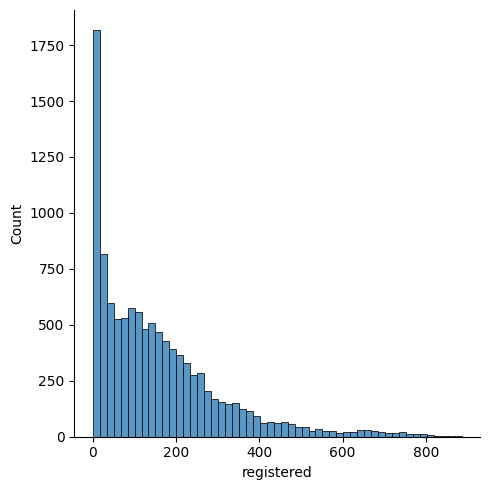

In [11]:
mpl.rc('font', size = 10)
sns.displot(train['registered'])

count할 경우 0에 데이터가 몰려있을 경우 왼쪽으로 편향되어 있을 가능성이 농후하다. 따라서 아래 값에 ln을 씌워 정규화 분포와 비슷한 느낌으로 변환 시킨다. np.log()를 할경우 안에 값에 ln을 입력시켜 준다.(np.log10인 경우 log를 입힘)

이후 타깃값을 복원하기 위해서는 e^ln()을 해줘야 한다

c:\Users\OWNER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


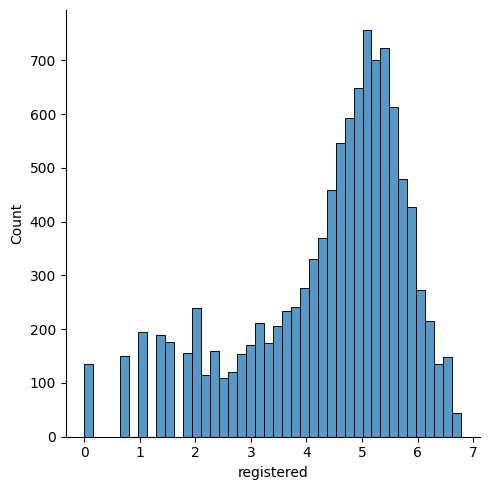

In [12]:
sns.displot(np.log(train['registered']))

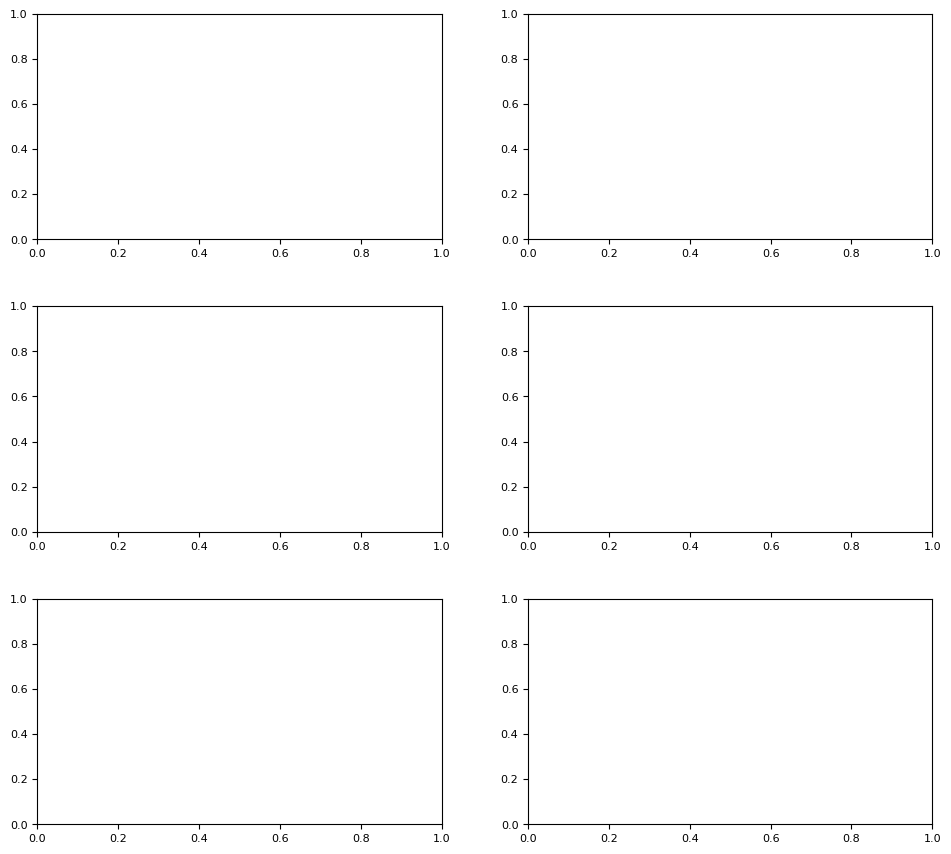

In [13]:
mpl.rc('font', size = 8)
mpl.rc('axes',titlesize = 15)
figure, axes = plt.subplots(nrows = 3, ncols =2)
plt.tight_layout()
figure.set_size_inches(10,9)

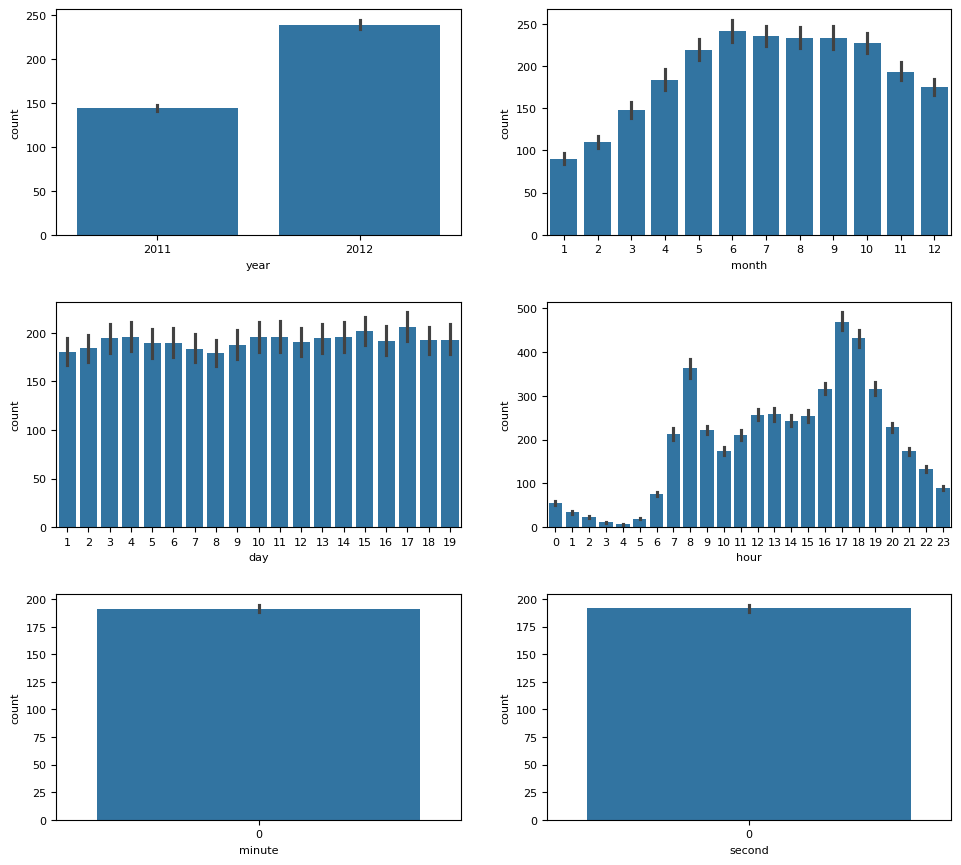

In [14]:
sns.barplot(x = 'year', y = 'count', data = train, ax=axes[0,0])
sns.barplot(x = 'month', y = 'count', data = train, ax=axes[0,1])
sns.barplot(x = 'day', y = 'count', data = train, ax=axes[1,0])
sns.barplot(x = 'hour', y = 'count', data = train, ax=axes[1,1])
sns.barplot(x = 'minute', y = 'count', data = train, ax=axes[2,0])
sns.barplot(x = 'second', y = 'count', data = train, ax=axes[2,1])
figure

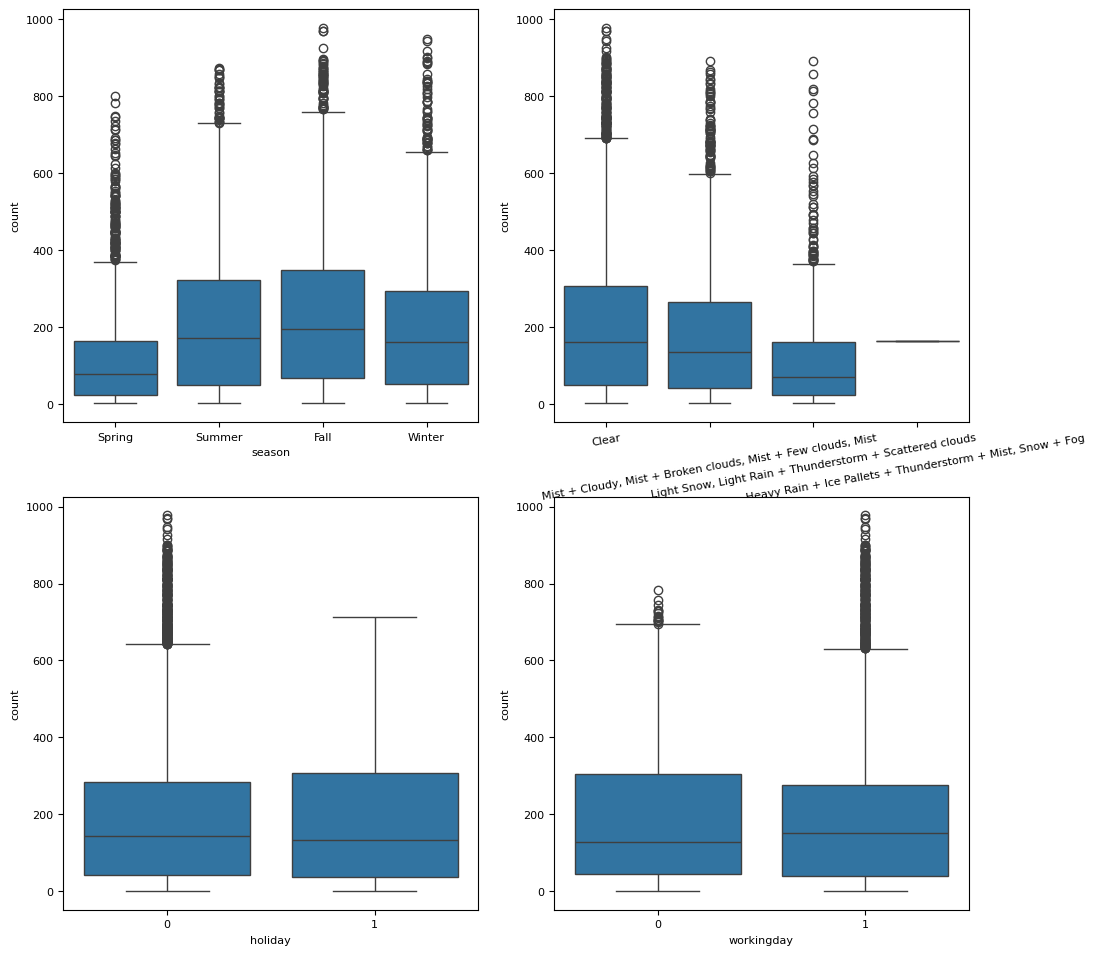

In [15]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x = 'season', y='count', data= train, ax = axes[0,0])
sns.boxplot(x = 'weather', y='count', data= train, ax = axes[0,1])
sns.boxplot(x = 'holiday', y='count', data= train, ax = axes[1,0])
sns.boxplot(x = 'workingday', y='count', data= train, ax = axes[1,1])

axes[0,1].tick_params(axis='x', labelrotation=10)

[Text(0.5, 1.0, 'Rental amounts by second')]

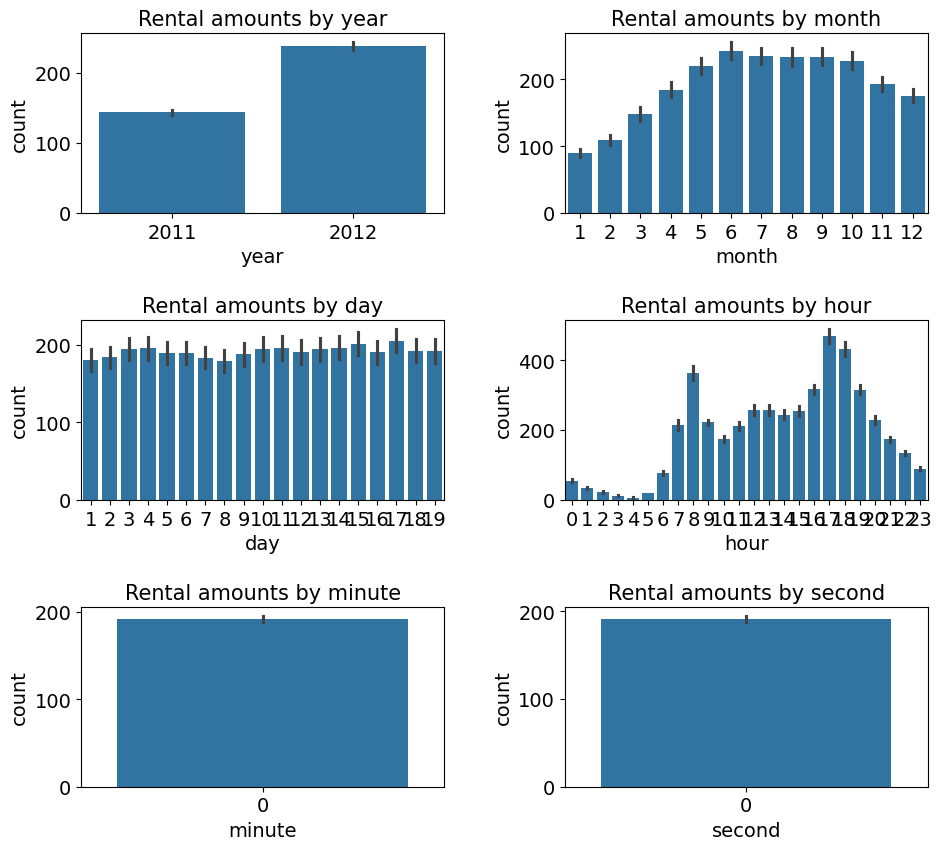

In [16]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

<Axes: xlabel='hour', ylabel='count'>

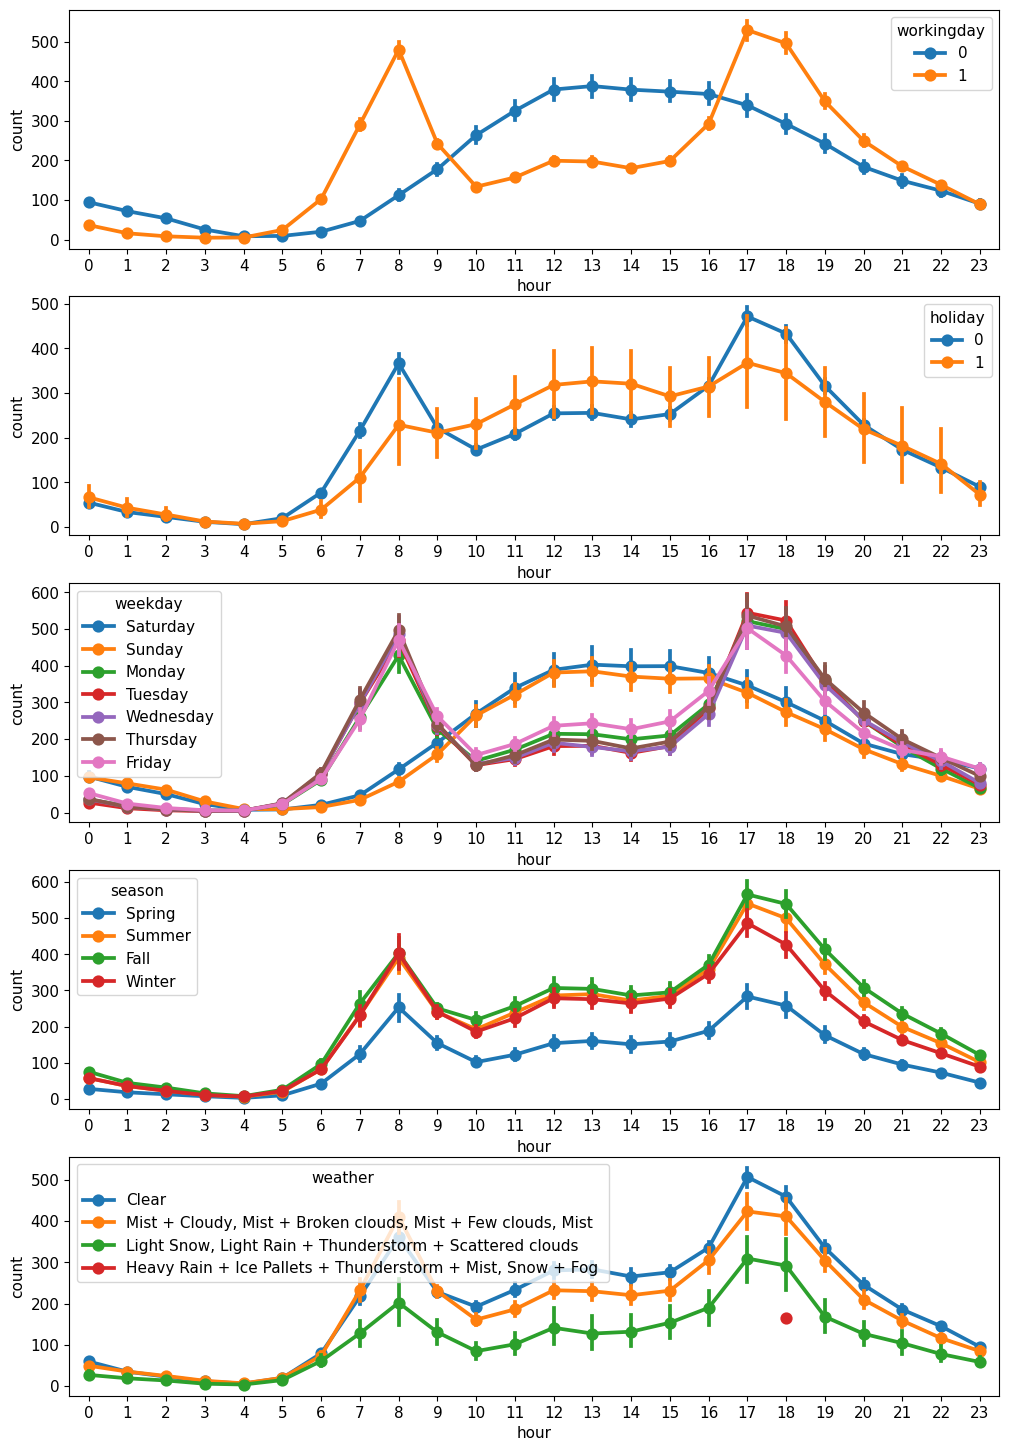

In [17]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

sns.pointplot(x='hour',y='count',data=train,hue='workingday',ax=axes[0])
sns.pointplot(x='hour',y='count', data=train,hue='holiday', ax=axes[1])
sns.pointplot(x='hour',y='count', data=train,hue='weekday', ax=axes[2])
sns.pointplot(x='hour',y='count', data=train,hue='season', ax=axes[3])
sns.pointplot(x='hour',y='count', data=train,hue='weather', ax=axes[4])

In [29]:
wh = train.pivot_table(index='holiday', columns='workingday', values='count', aggfunc='mean')
wh

workingday,0,1
holiday,,
0,188.765096,193.011873
1,185.877814,NaN


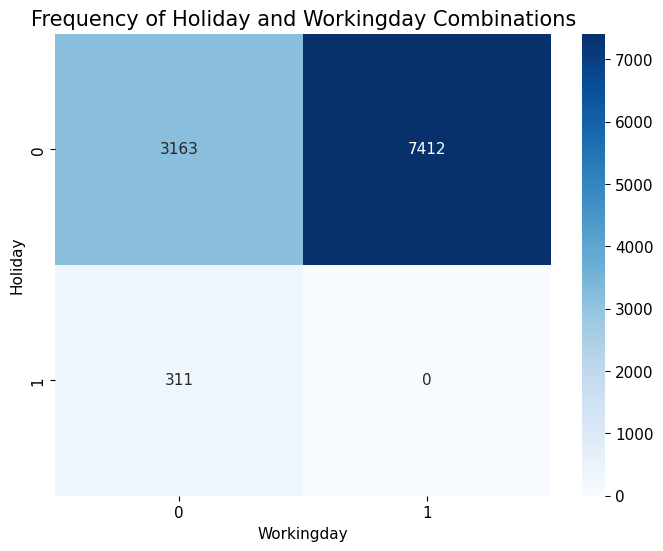

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# holiday와 workingday의 빈도표 생성
frequency_table = pd.crosstab(train['holiday'], train['workingday'])

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(frequency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Frequency of Holiday and Workingday Combinations')
plt.xlabel('Workingday')
plt.ylabel('Holiday')
plt.show()